In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 4.5 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 5.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import keras

from tensorflow.keras import layers
from tensorflow.keras import losses

2024-05-28 13:20:30.422025: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 13:20:30.747228: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 13:20:32.968802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 13:20:35.142860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
import matplotlib.pyplot as plt

In [ ]:
def custom_standardization(input_data):
  s = input_data.lower()
  s = re.sub(r'http\S+', ' ', s)
  s = re.sub(r'@\S+', '', s)
  s = re.sub(r'[\W\d]', ' ', s)
  return re.sub(r'\s+', ' ', s)

In [3]:
GRADE3 = {
    'Bad':0, 
    'Neutral':1, 
    'Good':2,
}

def classify(label):
    return GRADE3[label]

In [13]:
data = pd.read_json("/home/alex/Data/datasets/kinopoisk.jsonl", lines=True)

In [14]:
data

,part,movie_name,review_id,author,date,title,grade3,grade10,content
0,top250,Блеф (1976),17144,Come Back,2011-09-24,Плакали наши денежки ©,Good,10.0,"\n""Блеф» — одна из моих самых любимых комедий...."
1,top250,Блеф (1976),17139,Stasiki,2008-03-04,None,Good,0.0,\nАдриано Челентано продолжает радовать нас св...
2,top250,Блеф (1976),17137,Flashman,2007-03-04,None,Good,10.0,"\nНесомненно, это один из великих фильмов 80-х..."
3,top250,Блеф (1976),17135,Sergio Tishin,2009-08-17,""" Черное, красное, ерунда это все. Выигрывает ...",Good,0.0,\nЭта фраза на мой взгляд отражает сюжет несом...
4,top250,Блеф (1976),17151,Фюльгья,2009-08-20,"«Он хотел убежать? Да! Блеф, блеф…»",Neutral,7.0,"\n- как пела Земфира, скорее всего, по соверше..."
...,...,...,...,...,...,...,...,...,...
36586,bottom100,Цветок дьявола (2010),25123,bestiya163,2010-09-23,"Ой, ой, ой!",Bad,2.0,\n Ну с чего бы начать… Давненько я не пи...
36587,bottom100,Цветок дьявола (2010),25192,Молка,2010-10-02,Молчаливый мужик на коне…,Bad,1.0,"\n Можно начать с того, что уже постер к ..."
36588,bottom100,Цветок дьявола (2010),25080,jetry,2010-09-16,Это проявилось сегодня ночью.,Good,7.0,"\n Фильм производства России, поэтому мно..."
36589,bottom100,Цветок дьявола (2010),25088,Alkort,2010-09-16,«Finita la comedia»,Bad,0.0,\n 16 сентября на большие экраны вышел «м...


In [15]:
raw_content = data.pop('content')

In [16]:
raw_content_array = np.array(raw_content.map(custom_standardization))

In [17]:
grade3 = data.pop('grade3')

In [18]:
grade3_num=grade3.map(classify)

In [19]:
grade3_cat=keras.utils.to_categorical(grade3_num)

In [1]:
max_features = 10000
sequence_length = 1000

vectorize_layer = layers.TextVectorization(
    ngrams=2,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

NameError: name 'layers' is not defined

In [26]:
vectorize_layer.adapt(raw_content_array)

In [27]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'и',
 'в',
 'не',
 'что',
 'на',
 'это',
 'с',
 'но',
 'фильм',
 'как',
 'я',
 'то',
 'а',
 'из',
 'он',
 'все',
 'его',
 'по',
 'так',
 'о',
 'к',
 'за',
 'очень',
 'же',
 'фильма',
 'бы',
 'для',
 'от',
 'просто',
 'у',
 'только',
 'этот',
 'даже',
 'если',
 'когда',
 'мне',
 'было',
 'меня',
 'они',
 'который',
 'фильме',
 'можно',
 'уже',
 'до',
 'есть',
 'или',
 'кино',
 'она',
 'всё',
 'этого',
 'их',
 'еще',
 'может',
 'нет',
 'этом',
 'вот',
 'да',
 'мы',
 'ни',
 'жизни',
 'раз',
 'которые',
 'во',
 'после',
 'чем',
 'кто',
 'время',
 'себя',
 'чтобы',
 'того',
 'жизнь',
 'был',
 'один',
 'именно',
 'ведь',
 'быть',
 'том',
 'конечно',
 'всего',
 'ну',
 'своей',
 'сюжет',
 'где',
 'больше',
 'ему',
 'сказать',
 'хотя',
 'со',
 'без',
 'здесь',
 'потому',
 'ли',
 'вы',
 'него',
 'смотреть',
 'ты',
 'будет',
 'лишь',
 'тем',
 'просмотра',
 'всех',
 'роль',
 'всегда',
 'человек',
 'много',
 'ее',
 'людей',
 'более',
 'каждый',
 'при',
 'такой',
 'вообще',
 'ничего'

In [28]:
content = vectorize_layer(raw_content_array)

In [30]:
embedding_dim=100

embedding_layer = layers.Embedding(
    max_features + 1, 
    embedding_dim,
    embeddings_initializer="uniform",
)


model = tf.keras.Sequential([
  embedding_layer,  
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
#  layers.Dense(32, activation='relu'),
#  layers.Dense(32, activation='relu'),
  layers.Dense(3, activation='softmax')
])



In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss=losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
epochs = 10
history = model.fit(
    x = content,
    y = grade3_cat,
    validation_split=0.2,
    epochs=epochs)

Epoch 1/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8358 - loss: 0.5559 - val_accuracy: 0.3511 - val_loss: 1.7320
Epoch 2/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.8367 - loss: 0.5346 - val_accuracy: 0.3511 - val_loss: 1.7905
Epoch 3/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.8451 - loss: 0.4907 - val_accuracy: 0.3544 - val_loss: 1.8004
Epoch 4/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.8453 - loss: 0.4710 - val_accuracy: 0.3607 - val_loss: 1.6325
Epoch 5/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.8459 - loss: 0.4475 - val_accuracy: 0.4115 - val_loss: 1.1311
Epoch 6/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8485 - loss: 0.4319 - val_accuracy: 0.4018 - val_loss: 1.3232
Epoch 7/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8535 - loss: 0.4194 - val_accuracy: 0.4279 - val_loss: 1.1511
Epoch 8/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.8519 - loss: 0.4197 - 

In [34]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

export_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ ?                      │     1,000,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,403 (3.82 MB)

 Trainable params: 1,000,403 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

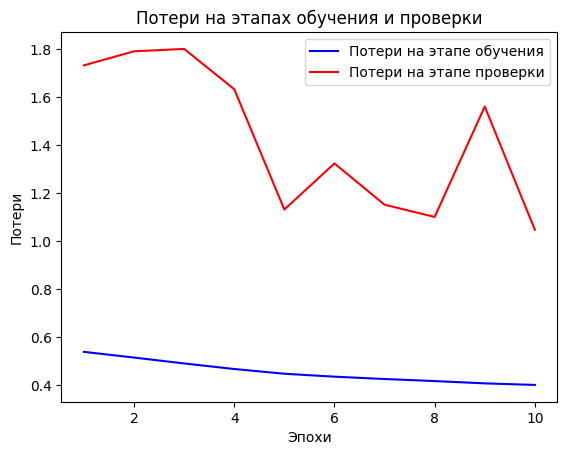

In [41]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "r", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()